##CRM analysis


> Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.



The dataset encompasses transactions from 01/12/2010 to 09/12/2011 for a non-store online retail business based and registered in the UK. Specializing in distinctive all-occasion gifts, the company's clientele includes a significant number of wholesale customers.




---



Importing the necessary packages







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data into dataframe named 'df'

In [8]:
df=pd.read_csv('Ecom_CRM_analysis.csv',encoding='unicode_escape')

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


###Basic Information on the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The data contains


1.   2 float type columns
1.   1 int type columns and
2.   5 object type columns






###Column Description


>
1.  InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
1.   StockCode: Product code that consists 5 digits.
2.   Description: Product name.
1.   Quantity: The quantities of each product per transaction.
2.   InvoiceDate: This represents the day and time when each transaction was generated.
1.   UnitPrice: Product price per unit.
2.   CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
1.   Country: Name of the country where each customer resides.

Note:
A negative quantity in this data set represents a "return transaction" instead of a "purchase transaction".
Transactions where the unit price is zero potentially indicate a free item.









##Data Clencing

In [10]:
#Finding the duplicated rows in the dataset
df.duplicated().sum()

5268

In [11]:
#Dropping the duplicated rows
df.drop_duplicates(inplace=True)

Checking for missing or null values in the dataset

In [12]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


Here, an attempt is made to fill the missing customer IDs using the invoice number wherever there is customer id present for same invoice number.

In [13]:
"""Fills missing customer IDs based on matching invoice numbers."""

# Group data by 'InvoiceNo'
grouped = df.groupby('InvoiceNo')['CustomerID'].first()

df['CustomerID']=df['CustomerID'].fillna(df['InvoiceNo'].map(grouped))

# Verify the changes
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


Unfortunately, none of the invoice numbers having missing customer id have any customer id input.

In [14]:
#dropping the columns with customer id as null
df.dropna(subset=['CustomerID'],inplace=True)

In [15]:
#Checking for missing values still existing
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [16]:
#Converting the invoice date into datetime format
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [17]:
#Converting customer id into string
df['CustomerID']=df['CustomerID'].astype(int).astype(str)

#Exploratory Data Analysis

In [18]:
#including total amount as new column
df['Amount']=df['Quantity']*df['UnitPrice']

In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [20]:
#The distribution of revenue over different countries
country=df.groupby('Country').aggregate({'Amount':['sum']}).reset_index()
country.columns=['Country','Total Revenue']
country=country.sort_values(by='Total Revenue',ascending=False).head(10)
country

,Country,Total Revenue
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050
0,Australia,137009.770
32,Switzerland,55739.400
30,Spain,54756.030
3,Belgium,40910.960
31,Sweden,36585.410


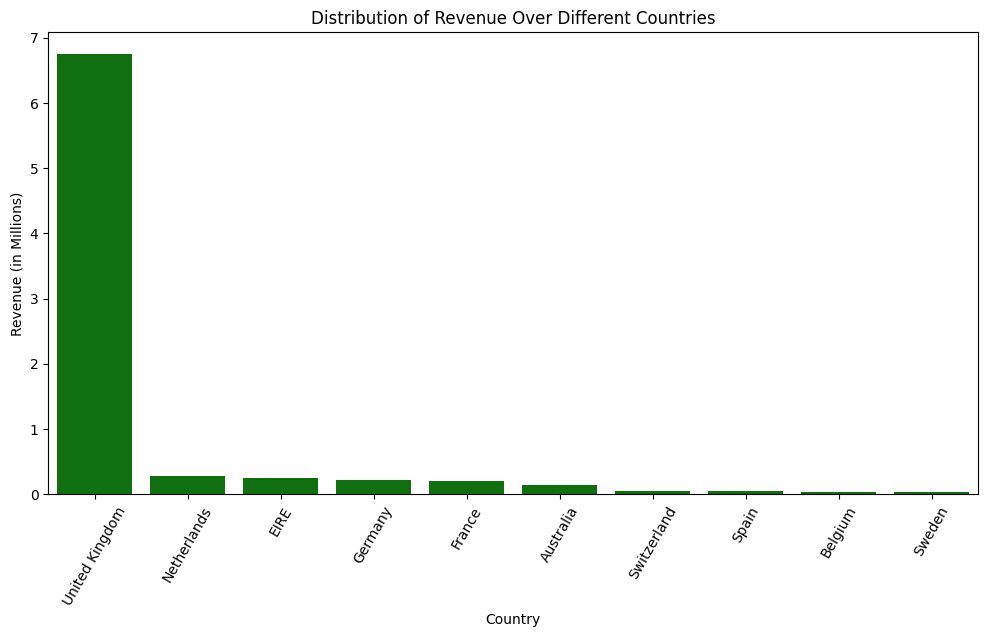

In [49]:
#barplot of the total revenue by countries
from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{int(value / 1000000)}'
plt.figure(figsize=(12,6))
sns.barplot(x=country['Country'],y=country['Total Revenue'],color='g')
plt.xticks(rotation=60)
plt.xlabel('Country')
plt.ylabel('Revenue (in Millions)')
plt.title('Distribution of Revenue Over Different Countries')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

In [21]:
#percentage of revenue from UK
df[df['Country']=='United Kingdom']['Amount'].sum()/df['Amount'].sum()*100

81.50196681836039

In [22]:
#average revenue from Netherlands Eire and Germany
country1=df.groupby(['Country','CustomerID'])['Amount'].sum().reset_index()
country2=country1.groupby('Country').aggregate({'CustomerID':'count','Amount':'mean'}).reset_index()
country2.columns=['Country','Customer_Count','Average Revenue']
country_expand=country2[country2['Country'].isin(['United Kingdom','Netherlands','Germany','EIRE','France','Australia'])][['Country','Customer_Count','Average Revenue']]
country_expand

,Country,Customer_Count,Average Revenue
0,Australia,9,15223.307778
10,EIRE,3,83333.926667
13,France,87,2260.069540
14,Germany,95,2331.678632
23,Netherlands,9,31629.060000
35,United Kingdom,3950,1708.140798


In [23]:
#Considering France and Germany to be having 10% of customer count in UK, the additional revenue
Rev_exp=2260*395+2331*395
Rev_exp

1813445

In [67]:
#Highest grossing products
product=df.groupby('Description')['Amount'].sum().sort_values(ascending=False).head(10)
product

,Amount
Description,
REGENCY CAKESTAND 3 TIER,132567.70
WHITE HANGING HEART T-LIGHT HOLDER,93767.80
JUMBO BAG RED RETROSPOT,83056.52
PARTY BUNTING,67628.43
POSTAGE,66710.24
ASSORTED COLOUR BIRD ORNAMENT,56331.91
RABBIT NIGHT LIGHT,51042.84
CHILLI LIGHTS,45915.41
PAPER CHAIN KIT 50'S CHRISTMAS,41423.78


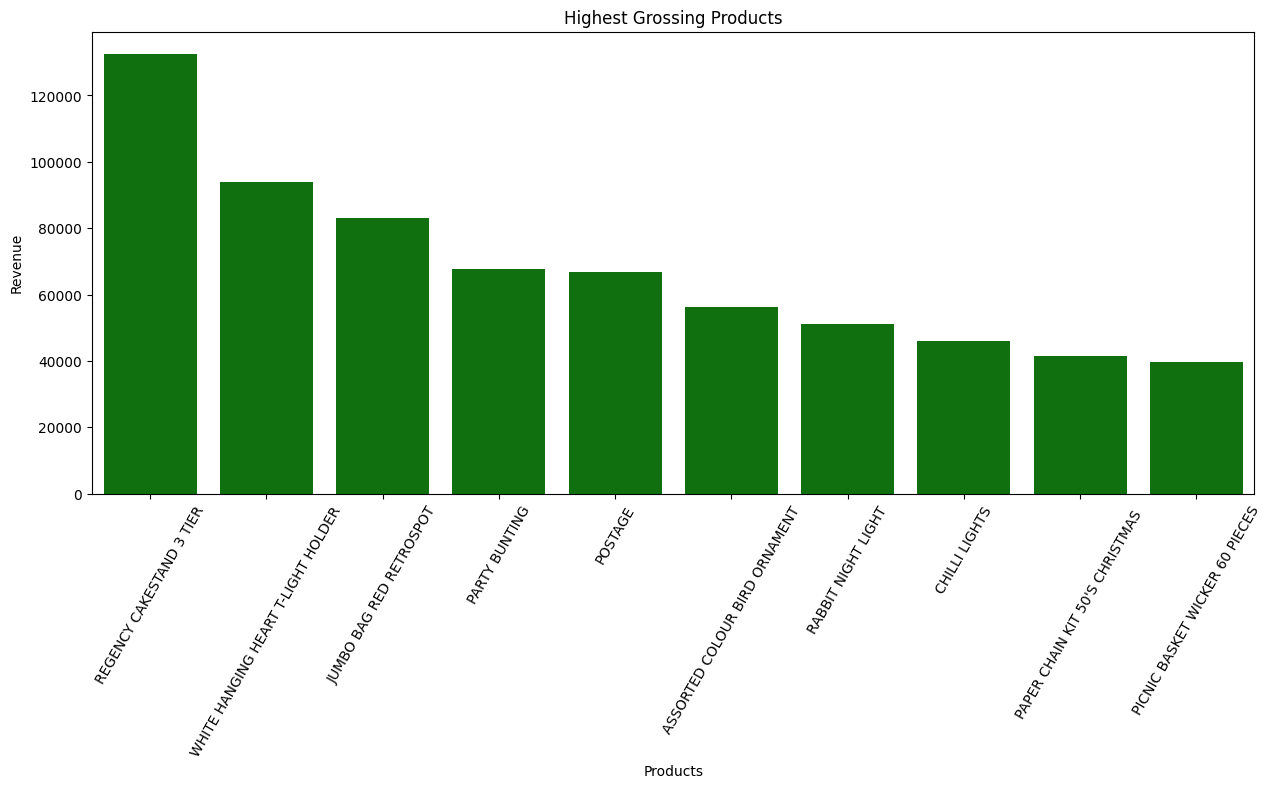

In [68]:
#barplot showing the highest grossing products
plt.figure(figsize=(15,6))
sns.barplot(x=product.index,y=product,color='g')
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.title('Highest Grossing Products')
plt.xticks(rotation=60)
plt.show()

In [24]:
#Highest grossing products by quantity
product_quantity=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
product_quantity

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
WHITE HANGING HEART T-LIGHT HOLDER,34128
PACK OF 72 RETROSPOT CAKE CASES,33386
POPCORN HOLDER,30492
RABBIT NIGHT LIGHT,27045
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25305


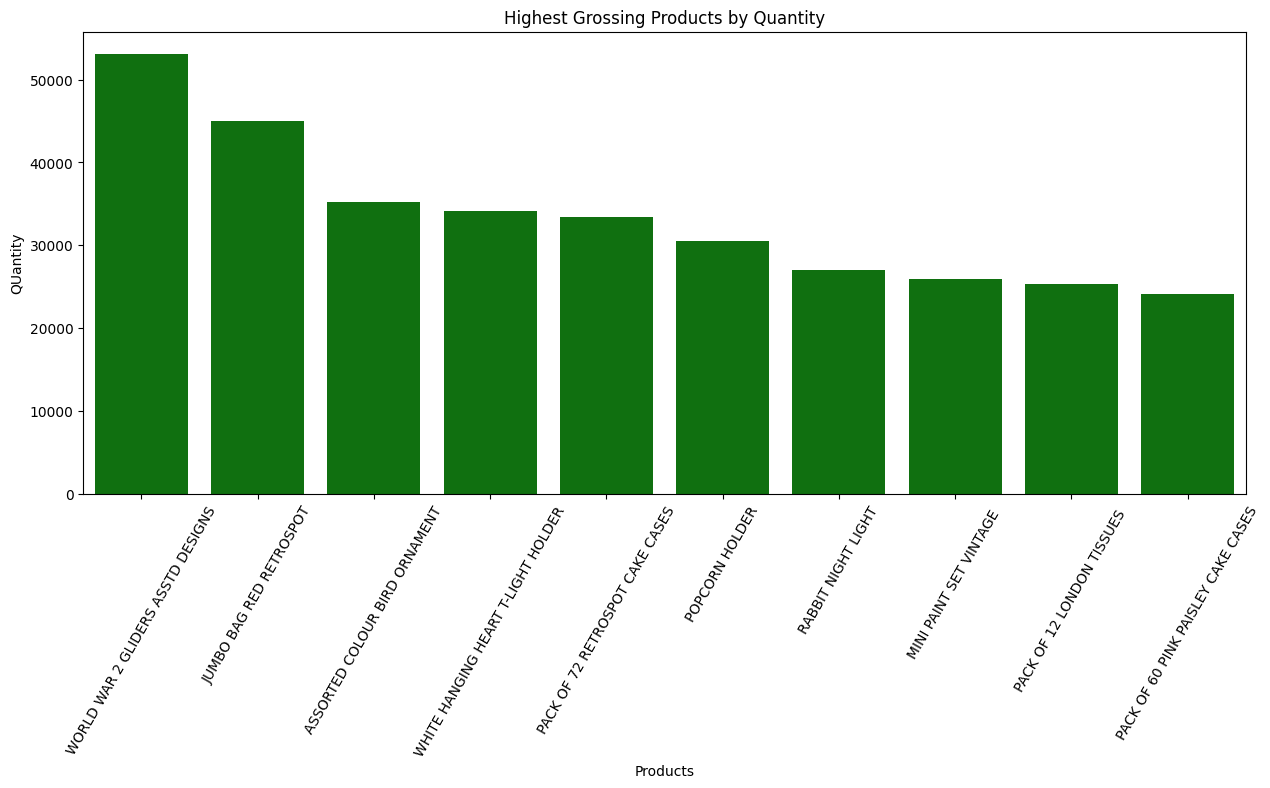

In [70]:
#barplot showing the highest grossing products
plt.figure(figsize=(15,6))
sns.barplot(x=product_quantity.index,y=product_quantity,color='g')
plt.xlabel('Products')
plt.ylabel('QUantity')
plt.title('Highest Grossing Products by Quantity')
plt.xticks(rotation=60)
plt.show()

In [71]:
#finding common elements from above two
common_elements = product.index.intersection(product_quantity.index)
common_elements


Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT',
       'ASSORTED COLOUR BIRD ORNAMENT', 'RABBIT NIGHT LIGHT'],
      dtype='object', name='Description')

##Analysing Favourite shopping times and trends

In [25]:
#Hour of the day from invoice date
df['Hour']=df['InvoiceDate'].dt.hour

In [26]:
#Month of the year and year from invoice date
df['Month']=df['InvoiceDate'].dt.month
df['Year']=df['InvoiceDate'].dt.year

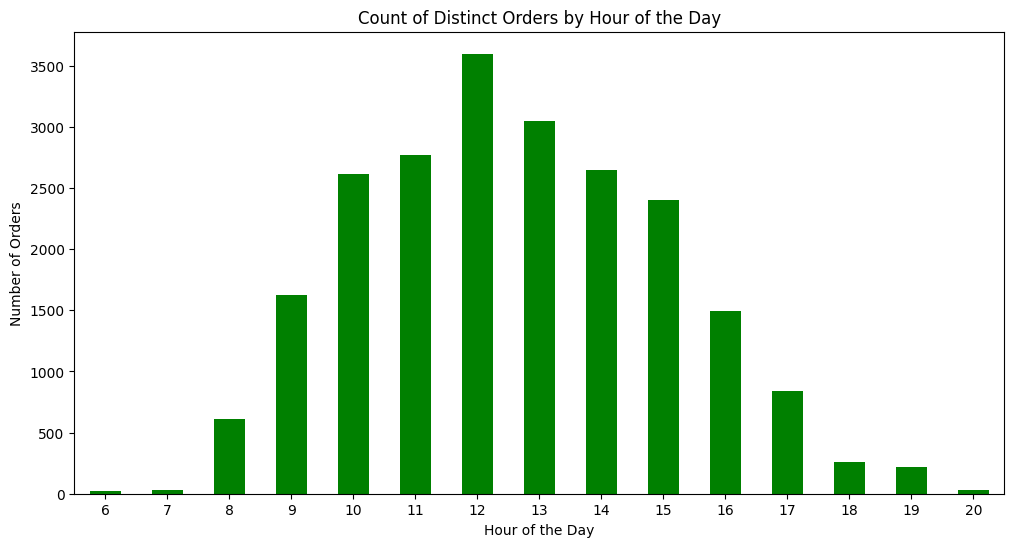

In [74]:
#countplot of the count of distinct orders in different hour of day
plt.figure(figsize=(12,6))
df.groupby('Hour')['InvoiceNo'].nunique().plot(kind='bar',color='g')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.title('Count of Distinct Orders by Hour of the Day')
plt.show()


In [28]:
#The percentage of distinct orders between 9 AM to 4 PM
(df[(df['Hour']>=9) & (df['Hour']<=16)]['InvoiceNo'].nunique())/df['InvoiceNo'].nunique()*100


90.9643983776476

In [27]:
#The percentage of distinct orders between 10 AM to 3 PM
(df[(df['Hour']>=10) & (df['Hour']<=15)]['InvoiceNo'].nunique())/df['InvoiceNo'].nunique()*100

76.93555655700766

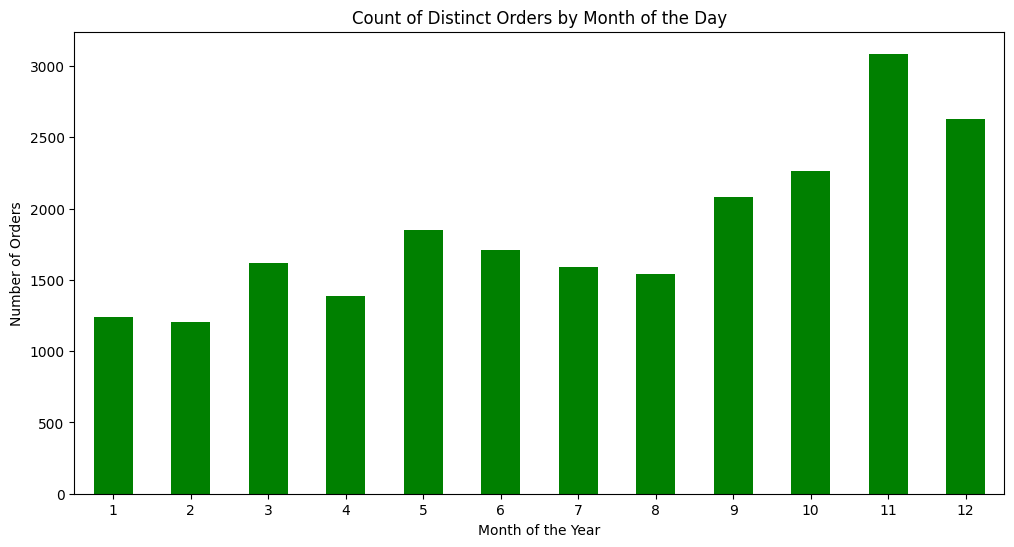

In [77]:
#countplot of transaction over months of year
plt.figure(figsize=(12,6))
df.groupby('Month')['InvoiceNo'].nunique().plot(kind='bar',color='g')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.title('Count of Distinct Orders by Month of the Day')
plt.show()

In [29]:
#percentage of orders between october and december
(df[(df['Month']>=10) & (df['Month']<=12)]['InvoiceNo'].nunique())/df['InvoiceNo'].nunique()*100

35.953132041460115

In [79]:
#Highest Spending customer details
customer_spending=df.groupby(['CustomerID','Country'])[['Amount']].sum().sort_values(by='Amount',ascending=False).head(10)
customer_spending

,,Amount
CustomerID,Country,
14646,Netherlands,279489.02
18102,United Kingdom,256438.49
17450,United Kingdom,187322.17
14911,EIRE,132458.73
12415,Australia,123725.45
14156,EIRE,113214.59
17511,United Kingdom,88125.38
16684,United Kingdom,65892.08
13694,United Kingdom,62690.54


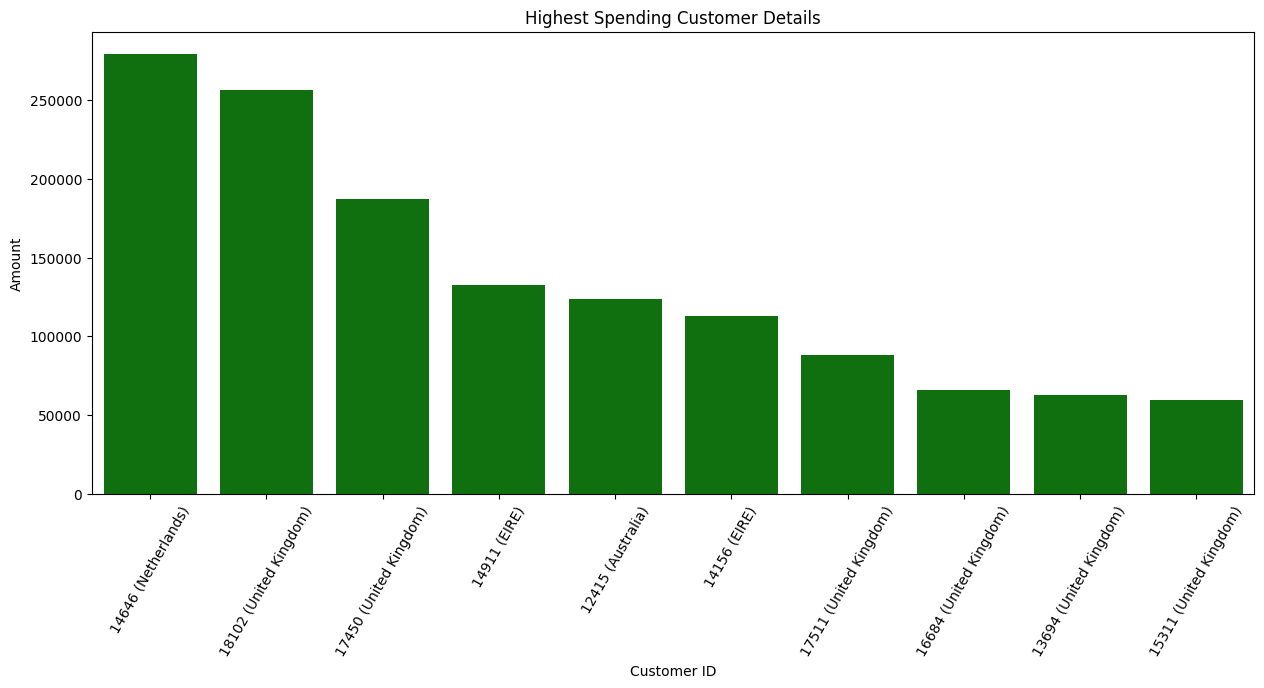

In [80]:
#Barplot showing the above
customer_spending.reset_index(inplace=True)
customer_spending['Customer']=customer_spending['CustomerID']+' ('+customer_spending['Country']+')'
customer_spending.drop(['CustomerID','Country'],axis=1,inplace=True)
plt.figure(figsize=(15,6))
sns.barplot(x=customer_spending['Customer'],y=customer_spending['Amount'],color='g')
plt.xticks(rotation=60)
plt.xlabel('Customer ID')
plt.ylabel('Amount')
plt.title('Highest Spending Customer Details')
plt.show()

In [30]:
#The products frequently ordered together
df2=df
#self joining
df_join=df.merge(df2,on='InvoiceNo',suffixes=('_1','_2'))[['Description_1','Description_2']]
df_join=df_join[df_join['Description_1']>df_join['Description_2']]


In [31]:
df_join.reset_index(inplace=True)
df_join

,index,Description_1,Description_2
0,2,WHITE HANGING HEART T-LIGHT HOLDER,CREAM CUPID HEARTS COAT HANGER
1,3,WHITE HANGING HEART T-LIGHT HOLDER,KNITTED UNION FLAG HOT WATER BOTTLE
2,4,WHITE HANGING HEART T-LIGHT HOLDER,RED WOOLLY HOTTIE WHITE HEART.
3,5,WHITE HANGING HEART T-LIGHT HOLDER,SET 7 BABUSHKA NESTING BOXES
4,6,WHITE HANGING HEART T-LIGHT HOLDER,GLASS STAR FROSTED T-LIGHT HOLDER
...,...,...,...
9484330,19380720,CHILDRENS CUTLERY CIRCUS PARADE,BAKING SET 9 PIECE RETROSPOT
9484331,19380724,BAKING SET 9 PIECE RETROSPOT,ALARM CLOCK BAKELIKE PINK
9484332,19380725,BAKING SET 9 PIECE RETROSPOT,ALARM CLOCK BAKELIKE RED
9484333,19380726,BAKING SET 9 PIECE RETROSPOT,ALARM CLOCK BAKELIKE GREEN


In [83]:
#Counting the highest 10 combinations
df_combo=df_join.groupby(['Description_1','Description_2'])['index'].count().reset_index()
df_combo=df_combo.sort_values(by='index',ascending=False).head(10)
df_combo

,Description_1,Description_2,index
449731,JUMBO BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT,583
1213614,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,573
4800,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,560
548621,LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,553
548628,LUNCH BAG RED RETROSPOT,LUNCH BAG PINK POLKADOT,553
547177,LUNCH BAG PINK POLKADOT,LUNCH BAG BLACK SKULL.,491
914927,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,483
2158244,WOODEN PICTURE FRAME WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,480
796334,PAPER CHAIN KIT VINTAGE CHRISTMAS,PAPER CHAIN KIT 50'S CHRISTMAS,479
550682,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG RED RETROSPOT,479


#Insights from EDA

>
1.   81.5% of company's income is coming from UK itself. Followed by Netherlands, Ireland, Germany and France
1.   The top selling product in terms of revenue is Regency cake stand 3 tier. Followed by White hanging heard T-light holder and Jumbo bag red retro spot.
2.   Top selling products based on quantity are WW2 gliders asstd designs, Jumbo bag red retro spot and assorted colour bird ornament.
1.   The products which came on top in both revenue and quantity are 'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT','ASSORTED COLOUR BIRD ORNAMENT' and 'RABBIT NIGHT LIGHT'
1.   90% of all the orders are placed between 9AM and 4PM. Also 77% of all orders are placed between 10AM and 3 PM.
2.   The number of orders see a rise during the festive seasons. 36% of orders receiving during Christmas.
2.   Even though the major part of income are from UK, the highest spending customers are also from Netherlands, Ireland and Australia.
2.   The analysis showed that several items are often ordered together.





#**CRM ANALYSIS RFM MODEL**



> The RFM (Recency, Frequency, Monetary) model is a powerful customer segmentation tool used in CRM (Customer Relationship Management) analysis to evaluate and categorize customers based on their purchasing behaviors. Here’s how it works:
*   **Recency** measures how recently a customer made a purchase. Customers who bought recently are often more engaged.
*   **Frequency** tracks how often a customer buys. Higher purchase frequency suggests brand loyalty.
*   **Monetary** measures the total amount a customer has spent. High spenders might be more valuable, warranting personalized attention.

 > By scoring customers on these three dimensions, businesses can group them into segments, such as high-value, loyal, or at-risk customers. This helps in tailoring marketing strategies, improving customer retention, and increasing sales through targeted promotions.





In the dataset,the difference between the last invoice date of each customer and the final date i.e, max of all the invoice dates are calculated in order to calculate the recency.

In [32]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Hour,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12,2011


In [33]:
#Finding the last purchase date of each customer
df['Last_purchase_date']=df.groupby('CustomerID')['InvoiceDate'].transform('max')

In [34]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Hour,Month,Year,Last_purchase_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,12,2010,2011-02-10 14:38:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010,2011-02-10 14:38:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,12,2010,2011-02-10 14:38:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010,2011-02-10 14:38:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010,2011-02-10 14:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,12,2011,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,12,2011,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12,2011,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12,2011,2011-12-09 12:50:00


In [35]:
#Reference date is the maximum of all invoice dates
df['Reference_date']=df['InvoiceDate'].max()



> Now, the RFM values are calculated using:
*   Recency : The number of days from last purchase date to the reference date
*   Frequency: The number of times the customer purchased in the given time period
*   Monetary : The amount the customer spent in the given time period.







In [36]:
#Calculating recency,frequqncy and monetary
df['Recency']=(df['Reference_date']-df['Last_purchase_date']).dt.days
df['Frequency']=df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df['Monetary']=df.groupby('CustomerID')['Amount'].transform('sum')

In [89]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Hour,Month,Year,Last_purchase_date,Reference_date,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,12,2010,2011-02-10 14:38:00,2011-12-09 12:50:00,301,35,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010,2011-02-10 14:38:00,2011-12-09 12:50:00,301,35,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,12,2010,2011-02-10 14:38:00,2011-12-09 12:50:00,301,35,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010,2011-02-10 14:38:00,2011-12-09 12:50:00,301,35,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,2010,2011-02-10 14:38:00,2011-12-09 12:50:00,301,35,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,12,2011,2011-12-09 12:50:00,2011-12-09 12:50:00,0,4,862.81
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,12,2011,2011-12-09 12:50:00,2011-12-09 12:50:00,0,4,862.81
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12,2011,2011-12-09 12:50:00,2011-12-09 12:50:00,0,4,862.81
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12,2011,2011-12-09 12:50:00,2011-12-09 12:50:00,0,4,862.81


Now, to calculate RFM ranking, we divide the customers into five divisions in terms of recency, frequency and monetary value.

In [37]:
#finding the quintiles of maximum recency value
df['Recency'].quantile([0.2,0.4,0.6,0.8])

,Recency
0.2,2.0
0.4,9.0
0.6,22.0
0.8,55.0


In [38]:
#finding the quintiles of maximum frequency value
df['Frequency'].quantile([0.2,0.4,0.6,0.8])

,Frequency
0.2,3.0
0.4,6.0
0.6,11.0
0.8,24.0


In [39]:
#finding the quintiles of maximum Monetary value
df['Monetary'].quantile([0.2,0.4,0.6,0.8])

,Monetary
0.2,859.71
0.4,1897.57
0.6,3574.91
0.8,7792.51


Using these values the customers are rated with Recency, Frequency and Monetary Scores

In [40]:
#Recency scoring
rec_20=df['Recency'].quantile(0.2)
rec_40=df['Recency'].quantile(0.4)
rec_60=df['Recency'].quantile(0.6)
rec_80=df['Recency'].quantile(0.8)
#The lesser the recency is the better, so:
def rec_score(x):
  if x<=rec_20:
    return 5
  elif x<=rec_40:
    return 4
  elif x<=rec_60:
    return 3
  elif x<=rec_80:
    return 2
  else:
    return 1

df['Recency_Score']=df['Recency'].apply(rec_score)

In [41]:
#Frequency scoring
freq_20=df['Frequency'].quantile(0.2)
freq_40=df['Frequency'].quantile(0.4)
freq_60=df['Frequency'].quantile(0.6)
freq_80=df['Frequency'].quantile(0.8)
#the higher the frequency the better so:
def freq_score(x):
  if x<=freq_20:
    return 1
  elif x<=freq_40:
    return 2
  elif x<=freq_60:
    return 3
  elif x<=freq_80:
    return 4
  else:
    return 5

df['Frequency_Score']=df['Frequency'].apply(freq_score)


In [42]:
#Monetary Scoring
mon_20=df['Monetary'].quantile(0.2)
mon_40=df['Monetary'].quantile(0.4)
mon_60=df['Monetary'].quantile(0.6)
mon_80=df['Monetary'].quantile(0.8)
#The higher the monetary value, the better so:
def mon_score(x):
  if x<=mon_20:
    return 1
  elif x<=mon_40:
    return 2
  elif x<=mon_60:
    return 3
  elif x<=mon_80:
    return 4
  else:
    return 5
df['Monetary_Score']=df['Monetary'].apply(mon_score)

In [43]:
df_RFM=df.groupby(['CustomerID']).aggregate({'Amount':'sum','Recency_Score':'first','Frequency_Score':'first','Monetary_Score':'first'}).reset_index()
df_RFM

,CustomerID,Amount,Recency_Score,Frequency_Score,Monetary_Score
0,12346,0.00,1,1,1
1,12347,4310.00,5,3,4
2,12348,1797.24,1,2,2
3,12349,1757.55,3,1,2
4,12350,334.40,1,1,1
...,...,...,...,...,...
4367,18280,180.60,1,1,1
4368,18281,80.82,1,1,1
4369,18282,176.60,4,1,1
4370,18283,2045.53,4,4,3


In [44]:
#concatenate the scores to have a consolidated RFM score
df_RFM['RFM_Score']=df_RFM['Recency_Score'].astype(str)+df_RFM['Frequency_Score'].astype(str)+df_RFM['Monetary_Score'].astype(str)
df_RFM

,CustomerID,Amount,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,0.00,1,1,1,111
1,12347,4310.00,5,3,4,534
2,12348,1797.24,1,2,2,122
3,12349,1757.55,3,1,2,312
4,12350,334.40,1,1,1,111
...,...,...,...,...,...,...
4367,18280,180.60,1,1,1,111
4368,18281,80.82,1,1,1,111
4369,18282,176.60,4,1,1,411
4370,18283,2045.53,4,4,3,443




> The UK Data & Marketing Association (DMA) laid out 11 segments, and specified marketing strategies according to their respective characteristics:



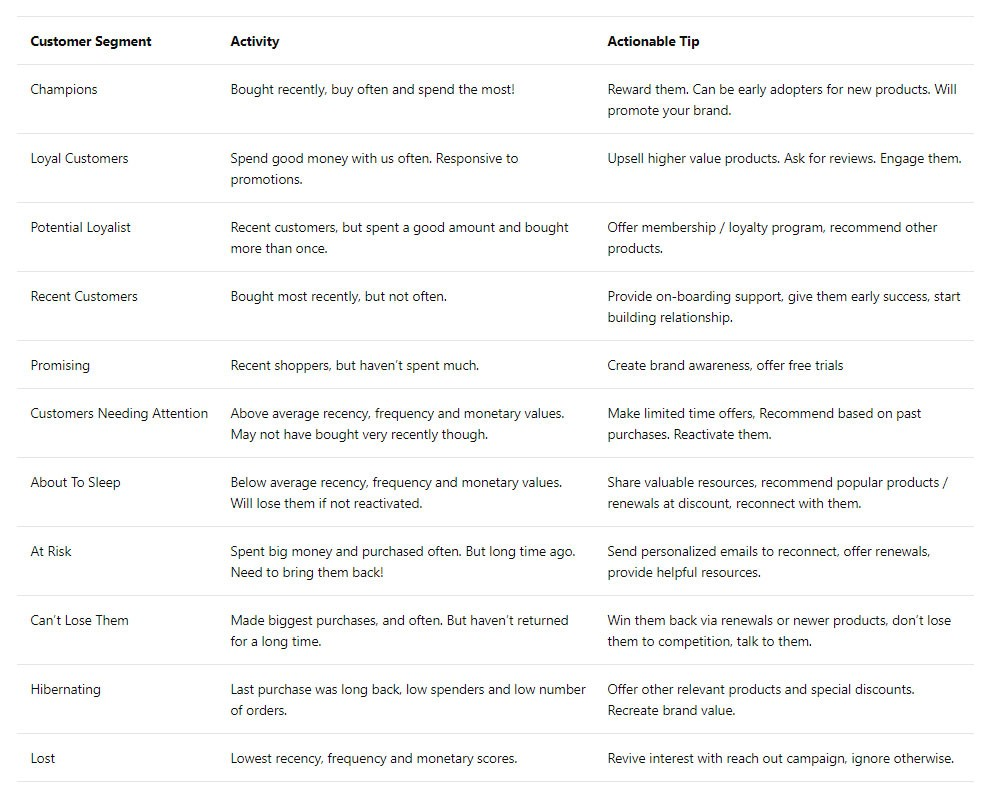

#User Segmentation based on RFM model

In [51]:
def segfun(x):
  if x in ['555','554','544','545','454','455','445']:
    return 'Champions'
  elif x in ['543','444','435','355','354','345','344','335']:
    return 'Loyal Customers'
  elif x in ['553','551','552','541','542','533','532','531','452','451','442','441','431','453','433','432','423','353','352','351','342','341','333','323']:
    return 'Potential Loyalists'
  elif x in ['512','511','421','422','412','411','311']:
    return 'New Customers'
  elif x in ['525','524','523','522','521','515','514','513','425','424','413','414','415','315','314','313']:
    return 'Promising'
  elif x in ['535','534','443','434','343','334','325','324']:
    return 'Needing Attention'
  elif x in ['255','254','245','244','253','252','243','242','235','234','225','224','153','152','145','143','142','135','134','133','125','124']:
    return 'At Risk'
  elif x in ['331','321','312','221','213']:
    return 'About to Sleep'
  elif x in ['155','154','144','214','215','115','114','113']:
    return 'Can’t Lose Them'
  elif x in ['332','322','231','241','251','233','232','223','222','132','123','122','212','211']:
    return 'Hibernating'
  elif x in ['111','112','121','131','141','151']:
    return 'Lost'

In [52]:
df_RFM['Customer_Segment']=df_RFM['RFM_Score'].apply(segfun)

In [53]:
df_RFM

,CustomerID,Amount,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Customer_Segment
0,12346,0.00,1,1,1,111,Lost
1,12347,4310.00,5,3,4,534,Needing Attention
2,12348,1797.24,1,2,2,122,Hibernating
3,12349,1757.55,3,1,2,312,About to Sleep
4,12350,334.40,1,1,1,111,Lost
...,...,...,...,...,...,...,...
4367,18280,180.60,1,1,1,111,Lost
4368,18281,80.82,1,1,1,111,Lost
4369,18282,176.60,4,1,1,411,New Customers
4370,18283,2045.53,4,4,3,443,Needing Attention


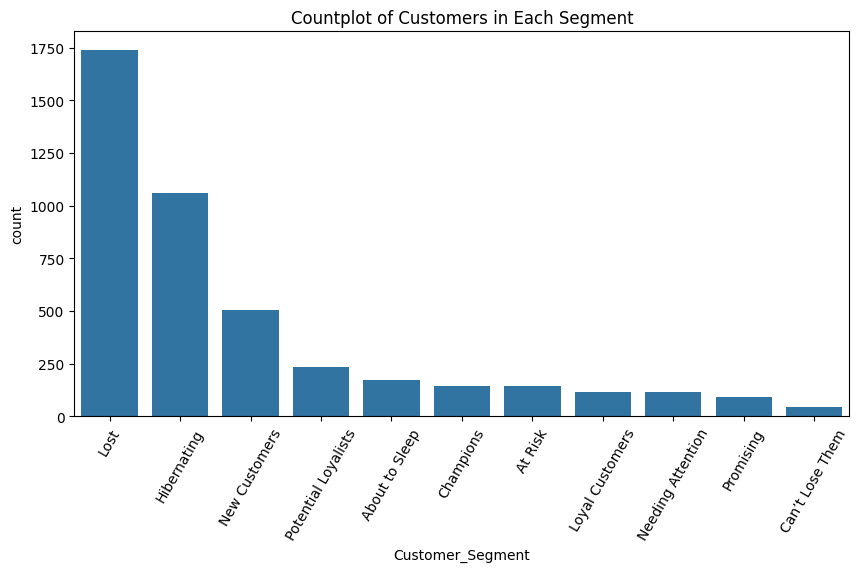

In [54]:
#countplot of customers in each segment
plt.figure(figsize=(10,5))
sns.countplot(x='Customer_Segment',data=df_RFM,order=df_RFM['Customer_Segment'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Countplot of Customers in Each Segment')
plt.show()

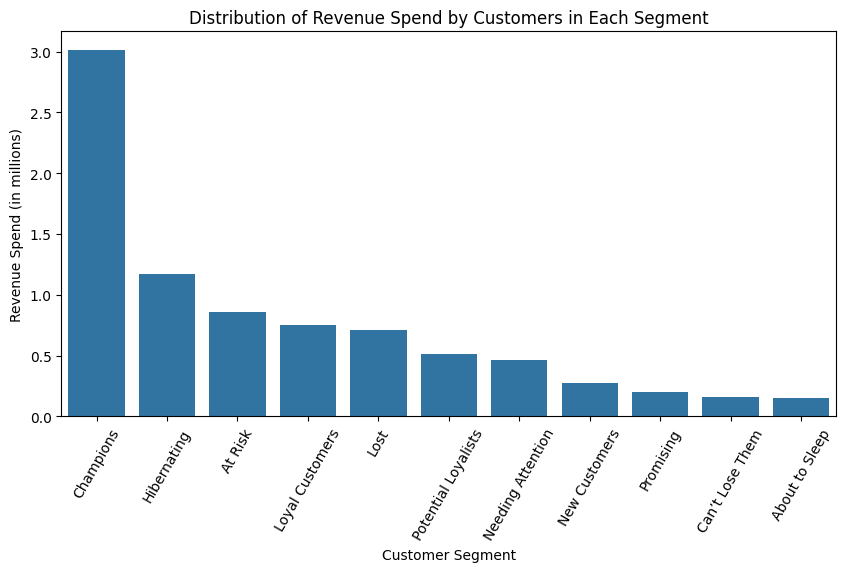

In [55]:
#Distribution of revenue spend by customers in each segment
from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{(value / 1000000)}'
plt.figure(figsize=(10,5))
df_seg=df_RFM.groupby('Customer_Segment')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=df_seg.index,y=df_seg.values)
plt.xticks(rotation=60)
plt.xlabel('Customer Segment')
plt.ylabel('Revenue Spend (in millions)')
plt.title('Distribution of Revenue Spend by Customers in Each Segment')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))



In [64]:
df_seg=df_RFM.groupby(['Customer_Segment']).aggregate({'Amount':'mean','CustomerID':'count'}).sort_values(by='Amount',ascending=False).reset_index()
rev_tot=df['Amount'].sum()
df_seg['% of Revenue']=round(df_seg['Amount']*df_seg['CustomerID']/rev_tot*100,2)
df_seg

,Customer_Segment,Amount,CustomerID,% of Revenue
0,Champions,20946.265069,144,36.43
1,Loyal Customers,6394.514274,117,9.04
2,At Risk,6055.314155,142,10.39
3,Needing Attention,4064.342807,114,5.60
4,Can’t Lose Them,3700.331159,44,1.97
5,Potential Loyalists,2174.654746,236,6.20
6,Promising,2167.527312,93,2.43
7,Hibernating,1105.270104,1062,14.18
8,About to Sleep,843.140863,175,1.78
9,New Customers,550.422198,505,3.36


In [59]:
#saving RFM table to csv file
df_RFM.to_csv('RFM_Table.csv')


#Insights from CRM Analysis


>
*   The main source of revenue is from 'Champion' segment of customers.
*   There is a large number of churned customers which are in the 'Lost' segment.
*   'Hibernating' segment of customers are good in  number and also provide for a large part of revenue.
*   'At Risk' segment of customers provide approximately equal amount of revenue as 'Loyal' customers.
*   The revenue generation from loyal customers is negligibly higher that that from 'Lost' or churned customers.







---



#Recomendations from CRM Analysis


>
*   The main market of the firm is in United Kingdom but there are transactions with customers from other countries also. There is a large scope of expansion, for the first step, if Germany and France are having even **5%** of the customers from UK,the additional revenue will be about **0.5 Million** more per year which is **11%** of the current total revenue.
*   Festive seasons see a surge in number of orders and the festival season of Nov-Dec contribute to **37%** of the revenue. Other festive seasons can also be incentivised to improve sales and revenue.
*   The main source of revenue is from '**Champion**' segment of customers. They are behind **36%** of total the revenue. Rewarding them will be advantageous since they act as brand ambassadors to the company and early adopters of new products.
*   The high number of '**Lost**' customers may indecate a high churn rate.Try to reactivate them with personalized campaigns. If it doesn’t work, better to ignore them.
*   '**Hibernating**' segment is large in both number and revenue.They are less frequent customers with low order value but offering relevant products and special discounts will create brand value again and bring them up to promising customers.This can boost the revenue by approximately **0.5 Million per year** with us **11%** of the current revenue.
*   There is a good percentage of revenue in '**At Risk**' segment.This section of customers are important since they contribute to about **10.4%** of the revenue in the given time period.It will be good to bring those customers back by sending personalized emails to reconnect with special offers and sharing useful resources with them.
*   There is a section of customers in '**Needing Attention**' segment.Their contribution to the revenue is **5.6%** in the time period but they became inactive towards the end of the period.Launch limited-time offers and recommendations based on previous orders to reactivate them.
*   There is a section of customers with high average order value that the firm cant loose. There has not a transaction with this group of customers for a long period towards the end. Get them back with new product launches. Don’t let competitors take them.
*   Upselling to the set of '**Loyal Customers**' and introducing the '**Potential Loyalists**' to loyalty programmes will boost the revenue and loyal customer base.
*   There are promising number of '**New customers**' in the given time period. But the average order value of them is less. Introduce the new customers to promotions and offers. The new customers have a potential to increase the revenue by **20%** in the future i.e, by **0.89 Million**.











---

